Objetivo: Analisar os dados do E-commerce e responder algumas perguntas de negócio

In [182]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [226]:
# pip install plotly

In [184]:
# URLs para referência
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

In [185]:
clientes = pd.read_csv(url_clientes)

In [186]:
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [187]:
vendas = pd.read_csv(url_vendas)

In [188]:
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [189]:
clientes.describe() # Análise estatística

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [190]:
vendas.describe() # Análise estatística

,ID_compra,preco_unitario,quantidade,frete
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [191]:
# Contagem dos clientes
clientes['sexo_biologico'].value_counts() # value_count realiza a contagem dos elementos de uma coluna

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [192]:
clientes['idade'].mean() # Realiza amédia das idades dos clientes

np.float64(38.2600097260496)

In [193]:
clientes['regiao'].value_counts() # Conta clientes por região

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [194]:
# Calculando a mediana das notas dos clientes
clientes['avaliacao_compra'].median()

np.float64(9.0)

In [195]:
# Conta os clientes que compraram com cashback
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

In [196]:
# Verificando as informações das vendas
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [197]:
# Transformando a data
vendas['data'] = pd.to_datetime(vendas['data'], format="%Y-%m-%d")

In [198]:
vendas.info() # Exibe informação do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [199]:
# Verificando a quantidade de vendas por departamento
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [200]:
# Calculo da média do preço unitario dos produtos
vendas['preco_unitario'].mean()

np.float64(873.2347382071648)

In [201]:
# Calculo da quantidade total de vendas
vendas['quantidade'].sum()

np.int64(18537)

In [202]:
# Calculando o valor total de frete
print("Valor total do frete: ", vendas['frete'].sum())
print("Valor do frete médio: ", vendas['frete'].mean())

Valor total do frete:  735553.51
Valor do frete médio:  119.23383206354353


In [203]:
# Quantidade de pagamentos por tipo
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: count, dtype: int64

In [204]:
# Unindo os dois dataframes
df = pd.merge(vendas, clientes, on='ID_compra')

In [205]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,Porto Alegre,Rio Grande do Sul,Sul,30,Masculino,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,São Paulo,São Paulo,Sudeste,36,Masculino,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,Porto Velho,Rondônia,Norte,39,Feminino,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,Recife,Pernambuco,Nordeste,35,Masculino,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,São Paulo,São Paulo,Sudeste,50,Masculino,Não,9


In [206]:
# Organiza as colunas
colunas_organizadas=['ID_compra', 'data', 'horario', 'categoria', 'preco_unitario',
                    'quantidade', 'frete', 'metodo_pagamento', 'ID_cliente', 'idade',
                    'sexo_biologico', 'cidade','uf', 'regiao', 'cashback', 'avaliacao_compra']
df=df[colunas_organizadas]

In [207]:
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


In [208]:
# Gerar tabela e gráfico
# Criando tabela métodos de pagamento
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index() 
metodos_de_pagamento.columns = ['Metodo de Pagamento', 'Quantidade']


Tabela 'metodos_de_pagamento':
  Metodo de Pagamento  Quantidade
0   Cartão de Crédito        2851
1                 PIX        2244
2    Cartão de Débito         547
3              Boleto         527


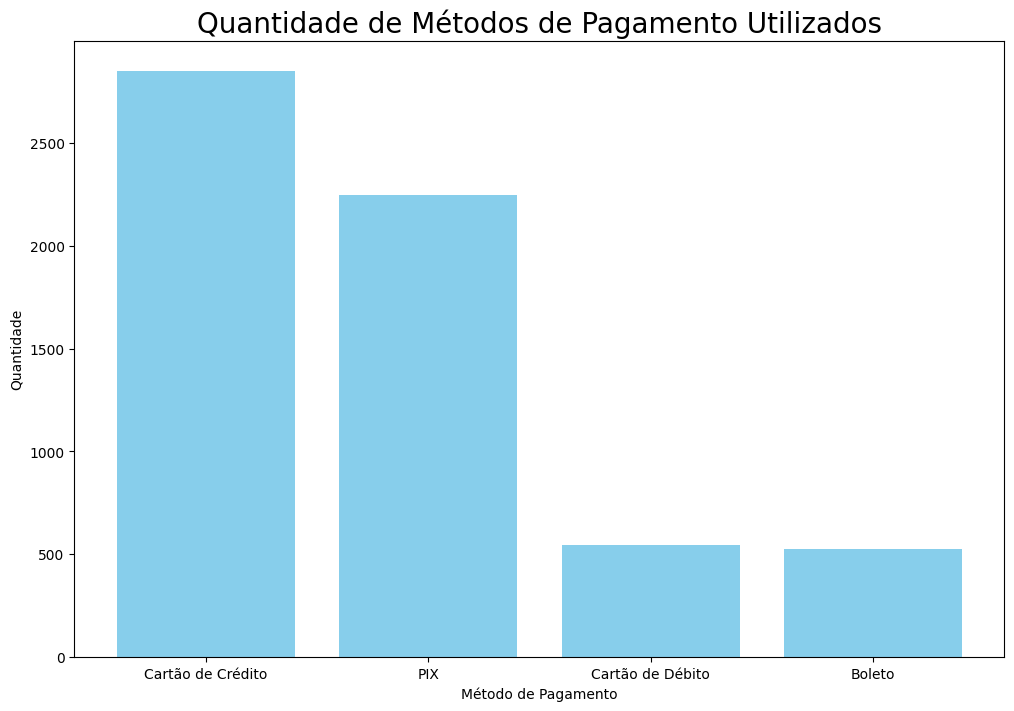

In [209]:
#Visualização
plt.figure(figsize=(12, 8)) 
plt.bar (metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue') 
plt.title('Quantidade de Métodos de Pagamento Utilizados', fontsize=20)
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=0, ha='center')
# Exibir a tabela
print("Tabela 'metodos_de_pagamento':")
print(metodos_de_pagamento)
# Exibir o gráfico
plt.show()

In [210]:
df['Faturamento'] = (df['preco_unitario']*df['quantidade'])+df['frete']

df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,Faturamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,18544.86
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,115.90
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,151.58
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,444.95
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9,660.00


In [211]:
# Faturamento agrupado por categoria
faturamento_categoria = df.groupby('categoria')['Faturamento'].sum().reset_index()

faturamento_categoria

,categoria,Faturamento
0,Alimentos e bebidas,241663.20
1,Beleza e cuidados pessoais,441649.72
2,Casa e limpeza,331036.13
3,Eletrodomésticos,4548591.79
4,Eletrônicos,11025894.73
5,Ferramentas e construção,264552.08
6,Livros,78380.24
7,Papelaria e escritório,47239.62


In [212]:
# Organizando faturamento por categoria
faturamento_categoria = faturamento_categoria.sort_values(by='Faturamento', ascending=False)


Text(0.5, 1.0, 'Faturamento por categoria')

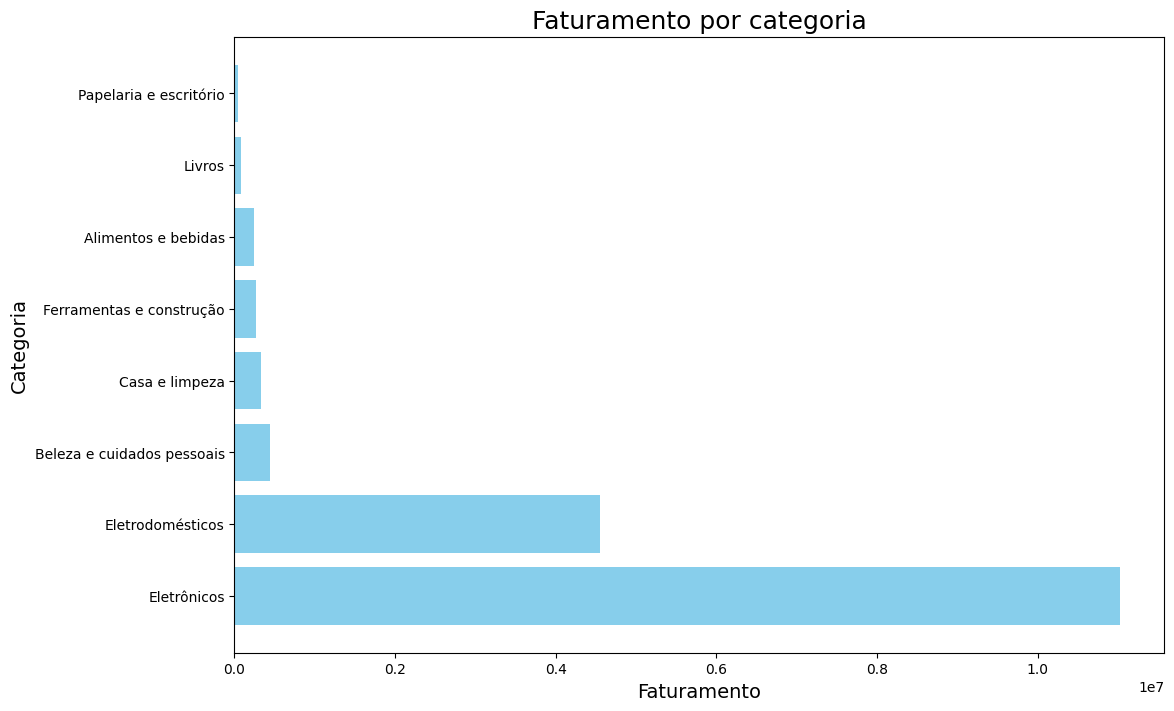

In [213]:
# Visualização
plt.figure(figsize=(12,8))
plt.barh(faturamento_categoria['categoria'],faturamento_categoria['Faturamento'],color='skyblue')
plt.xlabel('Faturamento',fontsize=14)
plt.ylabel('Categoria',fontsize=14)
plt.title('Faturamento por categoria',fontsize=18)

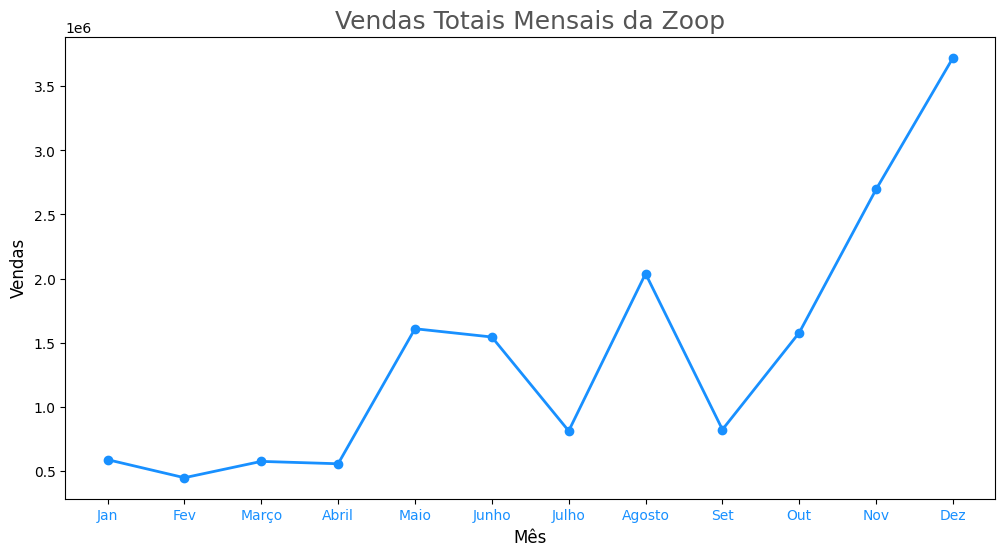

In [214]:
#Dicionario dos meses
meses = {
    'January':'Jan',
    'February':'Fev',
    'March':'Março',
    'April':'Abril',
    'May':'Maio',
    'June':'Junho',
    'July':'Julho',
    'August':'Agosto',
    'September':'Set',
    'October':'Out',
    'November':'Nov',
    'December':'Dez'
    }
#Agrupando por mes as vendas
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['Faturamento'].sum().reindex(meses.keys())
# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10,
            color='#1890FF')

# Exibir o gráfico
plt.show()

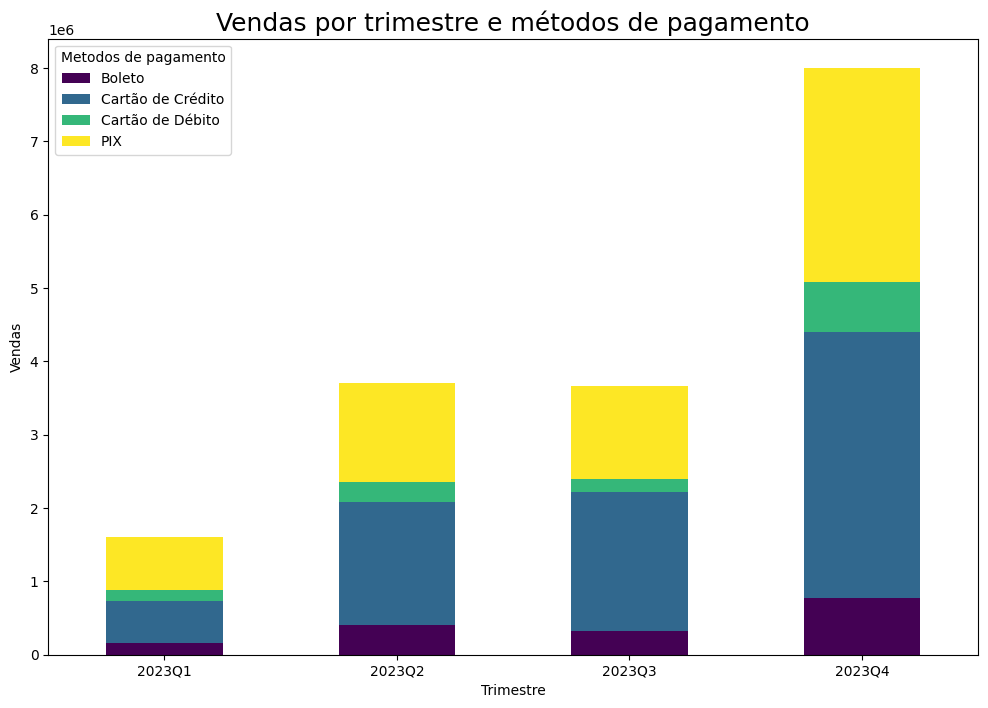

In [215]:
# Agrupamento das vendas por trimestre
df['trimestre']=df['data'].dt.to_period('Q')
#Agrupamento por trimestre
vendas_por_trimestre = df.groupby(['trimestre','metodo_pagamento'])['Faturamento'].sum().unstack()
# Visualização das barras empilhadas
vendas_por_trimestre.plot(kind= 'bar',stacked=True,figsize=(12,8),colormap='viridis')
plt.title('Vendas por trimestre e métodos de pagamento',fontsize= 18)
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Metodos de pagamento')
plt.xticks(rotation=0,ha='center')
plt.show()

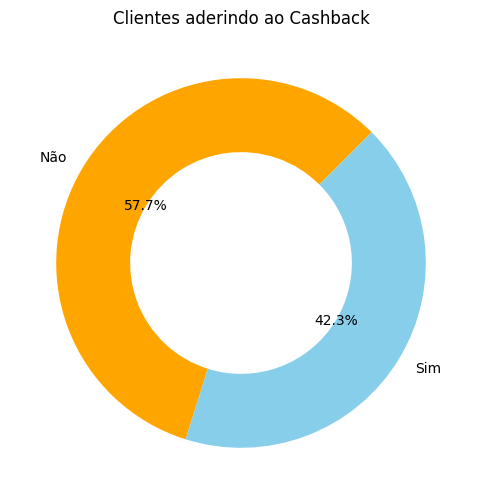

In [216]:
#Calculando a proporção do Cashback
proporcao_cashback = df['cashback'].value_counts(normalize=True)
#Cores
cores_invertidas = ['orange','skyblue']
# Visualização
plt.figure(figsize=(6,6))
plt.pie(proporcao_cashback,labels=proporcao_cashback.index,autopct='%1.1f%%',
        startangle=45,colors=cores_invertidas,wedgeprops=dict(width=0.4))
plt.title('Clientes aderindo ao Cashback')
plt.show()

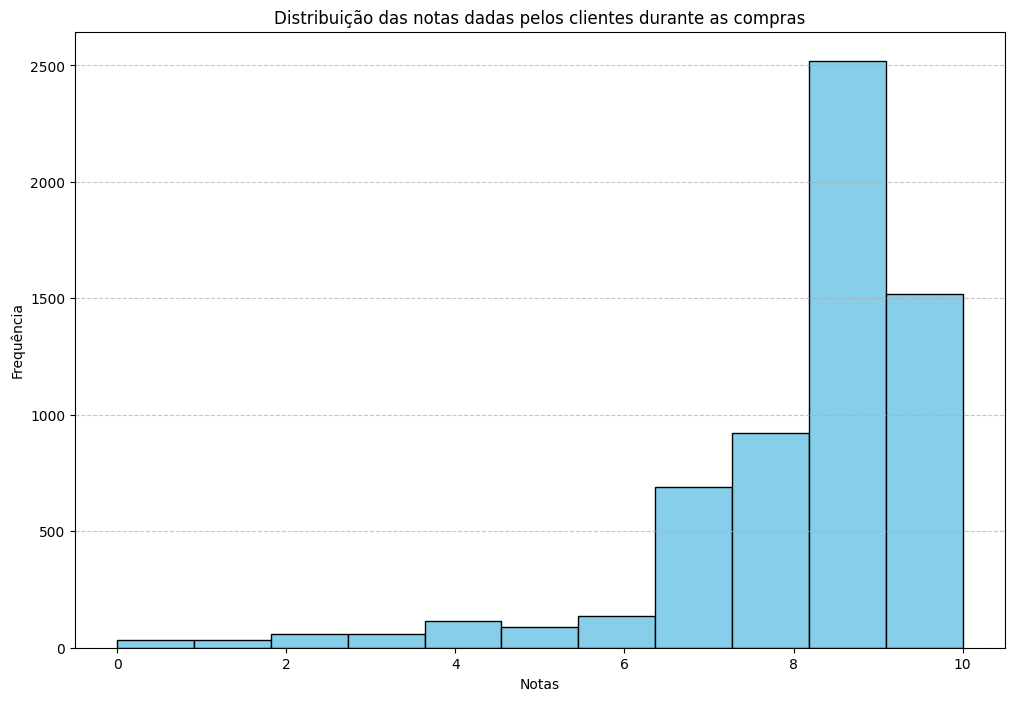

In [217]:
# Grafico com a visualização das notas
plt.figure(figsize=(12,8))
plt.hist(df['avaliacao_compra'],bins=11,edgecolor='black',color='skyblue')
plt.title('Distribuição das notas dadas pelos clientes durante as compras')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

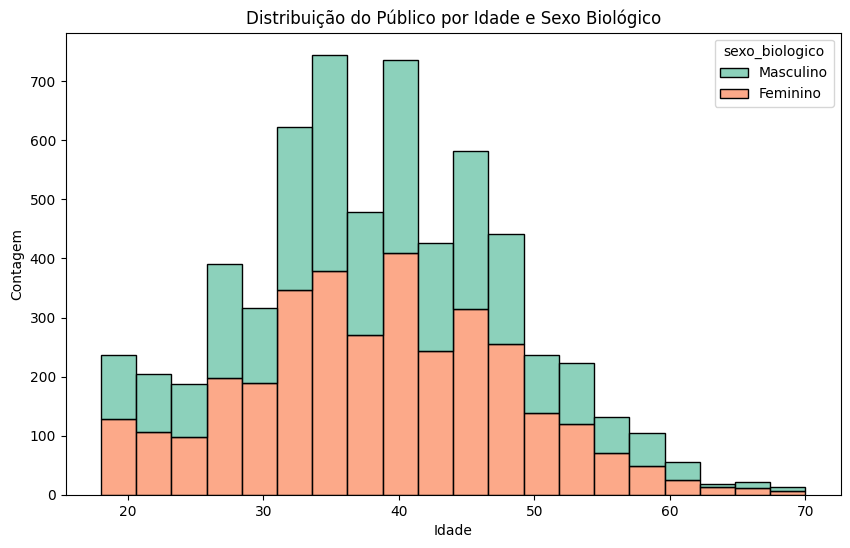

In [218]:
# Visualização da idade e genero dos clientes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='sexo_biologico', multiple='stack', bins=20, palette='Set2',legend=True)
plt.title('Distribuição do Público por Idade e Sexo Biológico')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_36472\2298864315.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




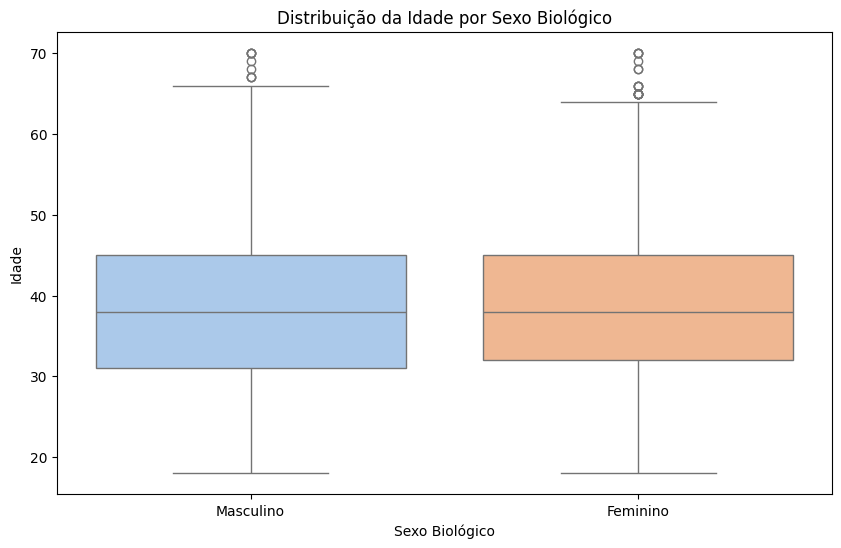

In [219]:
# Visualização em boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')
plt.title('Distribuição da Idade por Sexo Biológico')
plt.xlabel('Sexo Biológico')
plt.ylabel('Idade')

plt.show()

In [220]:
pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [227]:
# Filtrar as colunas desejadas
vendas_2023 = df[['regiao', 'uf', 'faturamento']]

# Criar o gráfico Treemap
fig = px.treemap(vendas_2023, path=['uf'], values='faturamento', color='regiao',
                color_discrete_map={'Centro-Oeste': '#0081a7',
                                    'Nordeste': '#00afb9',
                                    'Norte': '#fdfcdc',
                                    'Sudeste': '#fed9b7',
                                    'Sul': '#f07167'}
                )

# Atualizando o layout para adicionar título
fig.update_layout(width=1400, height=600,
                   title='Faturamento Total por Região e Estado',
                   margin = dict(t=25, l=0, r=0, b=0))

# Adicionar os valores dentro dos retângulos
fig.update_traces(textinfo='label+value')

# Exibir o gráfico
fig.show()

KeyError: "['faturamento'] not in index"

In [228]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc",
"#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

ValueError: not enough values to unpack (expected 6, got 4)

In [229]:
# Agrupar por método de pagamento e contar o total de ocorrências 
metodos_de_pagamento = df['metodo_pagamento'].value_counts()

# Calcular percentual
total_clientes = metodos_de_pagamento.sum()
percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

# Configurações do gráfico
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.bar(metodos_de_pagamento.index, metodos_de_pagamento, color=VERMELHO_1)

# Adicionar texto com o total acima de cada barra
for i, v in enumerate(metodos_de_pagamento):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color=AZUL_1, fontsize=12)
        
# Adicionar texto dentro da área do plot
plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX 
         \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos
          para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
            ha='left', va='center', color=AZUL_3, fontsize=10)

# Configurações adicionais
plt.title('Métodos de Pagamentos mais Utilizados em 2023', fontsize=18, color=CINZA_5) 
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks([])
plt.xlabel('Método de Pagamento', fontsize=12, color=AZUL_1)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.show()

SyntaxError: unterminated f-string literal (detected at line 19) (3902727362.py, line 19)